# Interpolation notebook 




# This notebook takes each light curve data - find potential upper limits in the flux and errors in photon index and replace the corresponding found points by Bspline Interpolation . 



# All datafiles are next saved into an interpolated version into a folder


In [4]:
#Usual imports

import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import scipy.interpolate 
import re
import csv
import warnings
import json
import matplotlib
import scipy as sp
import matplotlib.animation as animation
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [5]:
def Filterup(data):
    
    Flux= data['Flux']
    Time = data['MJD']
    ErrorF=data['Delta Flux']
    Photon_idx=data['Photon Index']
    Photon_err = data['Delta Index']
    
    Photon_idx=np.array(Photon_idx).astype(float)
    Flux=np.array(Flux).astype(float)
    ErrorF=np.array(ErrorF).astype(float)
    Photon_err=np.array(Photon_err).astype(float)
    Time=np.array(Time).astype(float)
    
    
    fluxUP=[]
    fluxUP_idx=[]
    photon_idx_up=[]
    
    for i in range(len(Flux)):
        if ErrorF[i]==0:
            fluxUP.append(Flux[i])
            fluxUP_idx.append(i)
            
        
    for i in range(len(Photon_idx)):
        
        if Photon_idx[i]<-4 :
            photon_idx_up.append(i)
    
    
    return Time,Photon_idx,Flux,fluxUP,fluxUP_idx,photon_idx_up,ErrorF
    

In [6]:
#Data location
import os

#Root directory of raw data
path_of_the_directory= "C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/"


data_files = []
file_names = []

#Directory of saving folder
Saving_Folder_adress= "C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/Interpolated data/"

#Storing in a list the adresses of all the data files in the notebook
for filename in os.listdir(path_of_the_directory):
    f = os.path.join(path_of_the_directory,filename)
    if os.path.isfile(f):
        data_files.append(f)
        file_names.append(filename)
# Transforming the files into csv files : 

# search_text = " "
# replace_text = ","
# for i in range(len(file_names)):  

#         with open(data_files[i], 'r') as file:


#             data = file.read()
#             data = data.replace(search_text, replace_text)

#         with open(data_files[i], 'w') as file:


#             file.write(data)


C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ0103+5337.txt


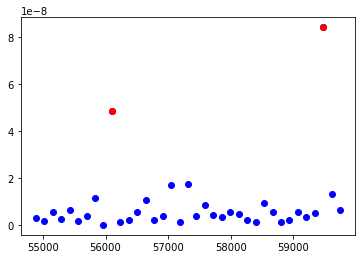

In [7]:
from scipy.interpolate import BSpline
from scipy import interpolate
from scipy.interpolate import interp1d

#For upper limits in flux
for kk in range(55,len(file_names)):
    #Read one file
    print(data_files[kk])
    dataframe = pd.read_csv(data_files[kk],index_col=[0])

    dataframe.columns=['MJD','Flux','Delta Flux','Photon Index','Delta Index','TS','fratio']
    
    dataframe2=dataframe.copy()
#     #Function calling
    Time,Photon_idx,Flux,fluxUP,fluxUP_idx,photon_idx_up,ErrorF= Filterup(dataframe2)
        
        #If this light curve has upper limits
        
    if len(fluxUP)>0:
        
        plt.scatter(Time,Flux,color='b')
        up_time=[Time[j] for j in fluxUP_idx]
        plt.scatter(up_time,fluxUP,color='r')
        break

Text(0, 0.5, 'Flux gamma (GeV.cm^2.s^-1).')

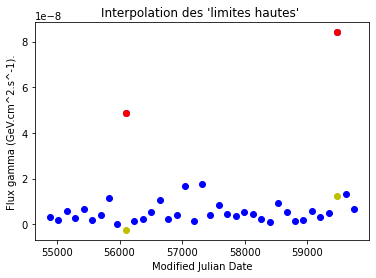

In [8]:
Bspline_proj=[]
#             #Calling the Bspline interpolation function and giving it data and parameters
JD=np.delete(Time,fluxUP_idx)
FLUX_points=np.delete(Flux,fluxUP_idx)
F_error=np.delete(ErrorF,fluxUP_idx)

tck = scipy.interpolate.splrep(JD, FLUX_points, s=0,k=3,per=1,w=1/F_error)  

#             #For all upper limits : 
for j in range(len(fluxUP)): 

    c = fluxUP_idx[j]
   #Interpolating one point
    yfit = scipy.interpolate.splev(Time[c], tck, der=0,ext=0)

    Bspline_proj.append(yfit)
    
plt.scatter(Time,Flux,color='b')
up_time=[Time[j] for j in fluxUP_idx]
plt.scatter(up_time,Bspline_proj,color='y')
plt.scatter(up_time,fluxUP,color='r')
plt.title("Interpolation des 'limites hautes' ")
plt.xlabel('Modified Julian Date')
plt.ylabel('Flux gamma (GeV.cm^2.s^-1).')

In [4]:
from scipy.interpolate import BSpline
from scipy import interpolate
from scipy.interpolate import interp1d

#For upper limits in flux
for kk in range(len(file_names)):
    #Read one file
    print(data_files[kk])
    dataframe = pd.read_csv(data_files[kk],index_col=[0])

    dataframe.columns=['MJD','Flux','Delta Flux','Photon Index','Delta Index','TS','fratio']
    
    dataframe2=dataframe.copy()
#     #Function calling
    Time,Photon_idx,Flux,fluxUP,fluxUP_idx,photon_idx_up,ErrorF= Filterup(dataframe2)
        
        #If this light curve has upper limits
        
    if len(fluxUP)>0:
            Bspline_proj=[]
#             #Calling the Bspline interpolation function and giving it data and parameters
            JD=np.delete(Time,fluxUP_idx)
            FLUX_points=np.delete(Flux,fluxUP_idx)
            F_error=np.delete(ErrorF,fluxUP_idx)
            tck = scipy.interpolate.splrep(JD, FLUX_points, s=0,k=3,per=1,w=1/F_error)  

#             #For all upper limits : 
            for j in range(len(fluxUP)): 

                c = fluxUP_idx[j]
               #Interpolating one point
                yfit = scipy.interpolate.splev(Time[c], tck, der=0,ext=0)

                Bspline_proj.append(yfit)
         
            for i in range(len(fluxUP)):

                c = fluxUP_idx[i]
                

                if Bspline_proj[i]<fluxUP[i] and Bspline_proj[i]>0 :
                    #Replace the point by the projected point in the dataframe
                    dataframe.replace(to_replace= fluxUP[i], value=Bspline_proj[i], inplace=True )
#                     dataframe.loc[c,'Flux']=Bspline_proj[i]

        
    if len(photon_idx_up)>0:  
            
            Bspline_proj1=[]
            PTIME=np.delete(Time,photon_idx_up)
            Photon_array=np.delete(Photon_idx,photon_idx_up)
            f = interpolate.interp1d(PTIME, Photon_array,fill_value="extrapolate")
            tck = scipy.interpolate.splrep(PTIME, Photon_array, s=0,k=1,per=1)    
            for i in range(len(photon_idx_up)):
                c =photon_idx_up[i]
                yfit1 = scipy.interpolate.splev(Time[c], tck, der=0,ext=0)
#                 yfit1 = f(FT_array[c])
                Bspline_proj1.append(yfit1)
            for i in range(len(photon_idx_up)):
                    gg=photon_idx_up[i]
                    dataframe.replace(to_replace= Photon_idx[gg], value=Bspline_proj1[i], inplace=True )
            
    
    dataframe.to_csv(Saving_Folder_adress+file_names[kk])


C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ0001+2113.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ0001-0747.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ0003-1149.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ0003-1928.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ0005+3824.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ0007+4008.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ0008+1455.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ0008+4711.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ0009+0628.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ0009+5030.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs

C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ0159+1046.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ0203+3042.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ0203+7233.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ0204+1513.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ0205+3212.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ0205-1700.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ0206-1151.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ0208+3523.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ0209+4449.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ0209+7229.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs

C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ0401+2112.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ0401-2034.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ0405-1308.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ0407+0741.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ0409-0359.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ0410+4216.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ0416+0105.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ0416-1852.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ0418+3807.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ0418-0252.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs

C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ0641-0320.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ0643+0857.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ0644+6039.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ0647+4527.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ0648+1516.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ0648-1743.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ0650-1636.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ0651+4013.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ0651+6525.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ0653+1636.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs

C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ0833+4223.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ0833-0458.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ0834+4402.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ0836+2141.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ0836-2026.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ0839+0105.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ0839+1803.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ0839+3540.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ0841+7053.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ0844+5312.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs

C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1008+0620.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1010-0158.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1012+0629.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1012+2439.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1012+4228.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1013+3444.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1014+2257.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1015+4926.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1015+5553.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1016+0512.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs

C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1143+6122.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1144+1937.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1146+3958.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1147-0724.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1150+2418.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1150+4154.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1151+0957.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1151+5859.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1151-1347.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1152-0839.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs

C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1306-2148.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1308+3547.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1309+1153.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1309+4305.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1310+2449.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1310+3221.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1310+5514.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1310-1158.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1311+0034.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1311+3233.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs

C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1439+3932.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1439+4958.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1440+0609.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1440-1530.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1441+1836.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1442+1200.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1442+4348.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1443+2501.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1443+4728.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1445-0326.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs

C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1640+1143.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1640+3945.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1640+6850.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1641-0621.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1642+3948.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1644+2620.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1645+6329.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1647+4950.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1648+4232.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1649+5235.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs

C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1852+4856.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1858+7318.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1903+5540.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1904+3627.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1911-1908.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1911-2006.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1913+4439.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1917-1921.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1921-1231.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ1921-1607.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs

C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ2202+4216.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ2203+1725.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ2204+0438.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ2206-0032.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ2207+4316.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ2209-0451.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ2211-1325.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ2212+2356.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ2212+2800.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs/LC_4FGLJ2216+2421.txt
C:/Users/pierr/Documents_kanop/Shps/Pierre_points_for_louis/Bureau/LCs